In [1]:
%tensorflow_version 2.x
import tensorflow

tensorflow.__version__

'2.2.0'

In [0]:
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
project_path = '/content/drive/My Drive/Datasets/'

In [0]:
images_zip_path = project_path + 'images.zip'

from zipfile import ZipFile

with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

In [0]:
DATASET_FOLDER = './images/'
TRAIN_CSV = 'train-2.csv'
VALIDATION_CSV = 'validation-3.csv'

In [0]:
# Get the training data
import numpy as np
import csv

IMAGE_SIZE = 128

with open(TRAIN_CSV, 'r') as f:
  
  y_train = np.zeros((sum(1 for line in f), 4))
  X_train = []
  f.seek(0)
  data = csv.reader(f, dialect='excel')
  for index, row in enumerate(data):
    for i, r in enumerate(row[1:7]):
      row[i+1] = int(r)
      path, image_height, image_width, x0, y0, x1, y1, _, _ = row
      path = "./" + path.split('/')[-2] + "/" + path.split('/')[-1]
      y_train[index, 0] = int(x0) * IMAGE_SIZE / int(image_width)
      y_train[index, 1] = int(y0) * IMAGE_SIZE / int(image_height)
      y_train[index, 2] = (int(x1) - int(x0)) * IMAGE_SIZE / int(image_width)
      y_train[index, 3] = (int(y1) - int(y0)) * IMAGE_SIZE / int(image_height)

    X_train.append(path)


In [0]:
# Fetchin the co-ordinate details
import cv2

filename = X_train[1051]
unscaled = cv2.imread(filename)
region = y_train[1051]
image_height, image_width, _ = unscaled.shape
x0 = int(region[0] * image_width / IMAGE_SIZE)
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[0] + region[3]) * image_height / IMAGE_SIZE)

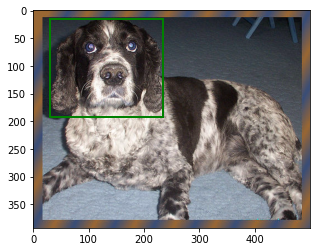

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1)

ax.imshow(unscaled)

rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='g', facecolor='none')

ax.add_patch(rect)

plt.show()


In [0]:
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input

for i, f in enumerate(X_train):
  img = Image.open(f)
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
  img = img.convert('RGB')

  X_train[i] = preprocess_input(np.array(img, dtype=np.float32))
  img.close

In [0]:
X_train = np.array(X_train)

In [58]:
X_train.shape

(3006, 128, 128, 3)

In [59]:
y_train

array([[36.90666667, 23.04      , 19.62666667, 27.52      ],
       [24.576     , 26.88      , 73.728     , 47.616     ],
       [49.05583756, 18.176     , 59.77664975, 50.176     ],
       ...,
       [24.064     , 13.79640719, 72.704     , 86.99401198],
       [70.144     , 32.19161677, 32.768     , 47.13772455],
       [24.591133  , 15.872     , 71.56650246, 49.664     ]])

In [0]:
with open(VALIDATION_CSV, "r") as f:

  y_val = np.zeros((sum(1 for line in f), 4))
  X_val = []
  f.seek(0)
  data = csv.reader(f, delimiter=",")
  for index, row in enumerate(data):
    for i, r in enumerate(row[1:7]):
      row[i+1] = int(r)
    path, image_height, image_width, x0, y0, x1, y1, _, _ = row

    path = "./" + path.split('/')[-2] + "/" + path.split('/')[-1]
    y_val[index, 0] = x0 * IMAGE_SIZE / image_width
    y_val[index, 1] = y0 * IMAGE_SIZE / image_height
    y_val[index, 2] = (x1 - x0) * IMAGE_SIZE / image_width
    y_val[index, 3] = (y1 - y0) * IMAGE_SIZE / image_height

    X_val.append(path)


In [22]:
X_val[:5]

['./images/Abyssinian_118.jpg',
 './images/Abyssinian_124.jpg',
 './images/Abyssinian_131.jpg',
 './images/Abyssinian_14.jpg',
 './images/Abyssinian_15.jpg']

In [0]:
for i, f in enumerate(X_val):
  img = Image.open(f)
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
  img = img.convert('RGB')

  X_val[i] = preprocess_input(np.array(img, dtype=np.float32))

  img.close()

In [0]:
X_val = np.array(X_val)

In [26]:
X_val.shape

(680, 128, 128, 3)

In [29]:
y_val

array([[ 0.38438438,  8.704     , 98.4024024 , 68.864     ],
       [33.82582583, 24.064     , 45.74174174, 25.856     ],
       [ 6.99678457, 10.        , 77.78778135, 62.        ],
       ...,
       [52.48      , 36.18133333, 28.928     , 45.056     ],
       [24.832     ,  6.03141361, 49.408     , 76.06282723],
       [11.776     , 19.21921922, 67.84      , 88.02402402]])

In [30]:
y_val.shape

(680, 4)

In [0]:
# Create the model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape

ALPHA = 1.0

def create_model(trainable = True):
  model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA)

  for layer in model.layers:
      layer.trainable = trainable
    
  x0 = model.layers[-1].output
  x1 = Conv2D(4, kernel_size=4, name="coords")(x0)

  x2 = Reshape((4,))(x1)

  return Model(inputs=model.input, outputs=x2)

In [0]:
#Define evaluation matrix

def IOU(y_true, y_pred):
    intersections = 0
    unions = 0

    gt = y_true
    pred = y_pred

    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height


    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

    for j, _ in enumerate(union):
      if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
        intersections += intersection[j]
        unions += union[j]

    iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()), 4)
    
    iou = iou.astype(np.float32)
    return iou

In [0]:
def IoU(y_true, y_pred):
  iou = tensorflow.py_function(IOU, [y_true, y_pred], Tout=tensorflow.float32)
  return iou

In [80]:
model = create_model(False)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128 

In [0]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[IoU])

In [82]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_IoU', patience=5, min_delta=0.01)

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[callback])

Epoch 1/10
94/94 [==============================] - 48s 515ms/step - loss: 282.5433 - IoU: 0.4933 - val_loss: 113.5194 - val_IoU: 0.6131
Epoch 2/10
94/94 [==============================] - 48s 511ms/step - loss: 80.5642 - IoU: 0.6607 - val_loss: 93.6218 - val_IoU: 0.6484
Epoch 3/10
94/94 [==============================] - 49s 519ms/step - loss: 53.7064 - IoU: 0.7134 - val_loss: 86.8961 - val_IoU: 0.6537
Epoch 4/10
94/94 [==============================] - 48s 508ms/step - loss: 39.6103 - IoU: 0.7486 - val_loss: 86.7309 - val_IoU: 0.6574
Epoch 5/10
94/94 [==============================] - 48s 506ms/step - loss: 30.1741 - IoU: 0.7765 - val_loss: 86.7492 - val_IoU: 0.6634
Epoch 6/10
94/94 [==============================] - 47s 503ms/step - loss: 23.1918 - IoU: 0.8010 - val_loss: 86.1216 - val_IoU: 0.6571


In [83]:
model.evaluate(X_val, y_val)

22/22 [==============================] - 9s 387ms/step - loss: 86.1216 - IoU: 0.6571


[86.12161254882812, 0.6570909023284912]

In [0]:
#Test the model on an image from the test data

filename = './images/shiba_inu_163.jpg'

unscaled = cv2.imread(filename)

In [98]:
image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE))

feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
print("Size of original input: ", image.shape)
print("-------------------------------")
print("Size of scaled input: ", feat_scaled.shape)

Size of original input:  (128, 128, 3)
-------------------------------
Size of scaled input:  (128, 128, 3)


In [0]:
region = model.predict(x=np.array([feat_scaled]))[0]

In [0]:
x0 = int(region[0] * image_width / IMAGE_SIZE)
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

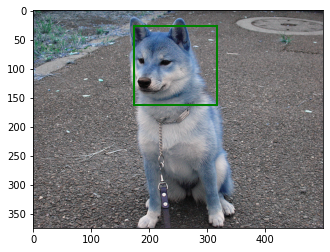

In [109]:
fig, ax = plt.subplots(1)

ax.imshow(unscaled)

rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='g', facecolor='none')

ax.add_patch(rect)
plt.show()

In [0]:
filename = './images/Abyssinian_14.jpg'
unscaled = cv2.imread(filename)

In [0]:
image_width, image_height, _ = unscaled.shape
image =cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

In [0]:
region = model.predict(x=np.array([feat_scaled]))[0]

In [0]:
x0 = int(region[0] * image_width / IMAGE_SIZE)
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * ( image_width) / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * ( image_width) / IMAGE_SIZE)

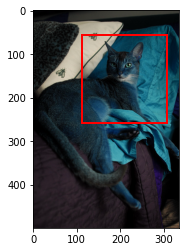

In [120]:
fig, ax = plt.subplots(1)

ax.imshow(unscaled)

rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

ax.add_patch(rect)

plt.show()